In [1]:
# Load libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



%matplotlib inline
#sns.set(style='whitegrid', context='notebook')
plt.rcParams['figure.figsize'] = (10, 7)

In [2]:
df = pd.read_csv('Medical_insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Age unique value
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## EDA

Text(0.5, 1.0, 'Children vs Charges')

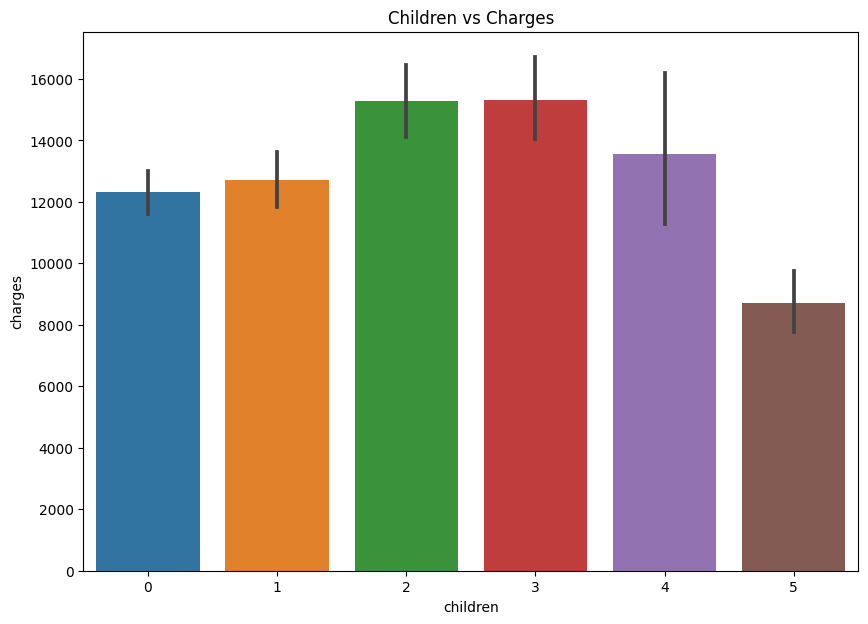

In [7]:
sns.barplot(x='children',y='charges',data=df)
plt.title('Children vs Charges')

Text(0.5, 1.0, 'Smoker vs Charges')

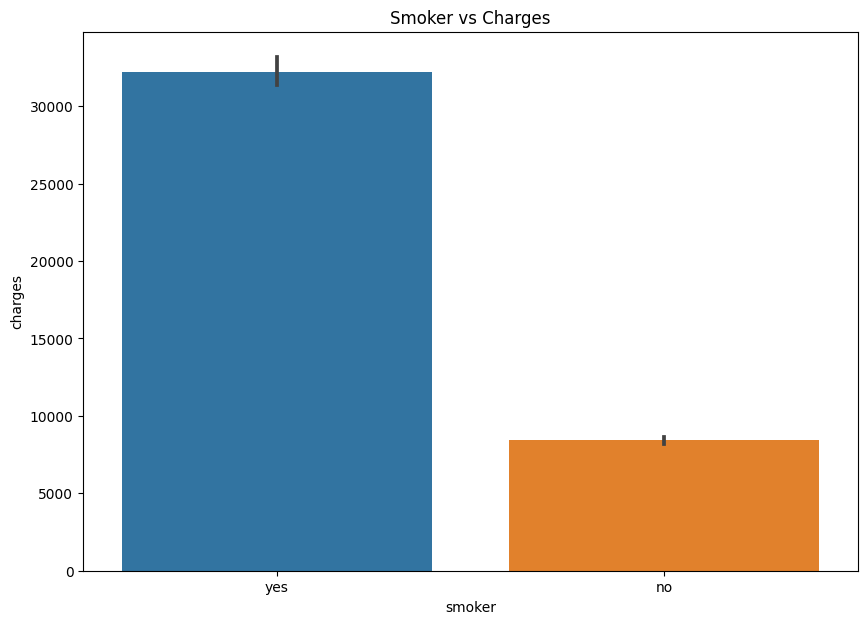

In [8]:
sns.barplot(x='smoker',y='charges',data=df)
plt.title('Smoker vs Charges')

Text(0.5, 1.0, 'Sex vs Charges')

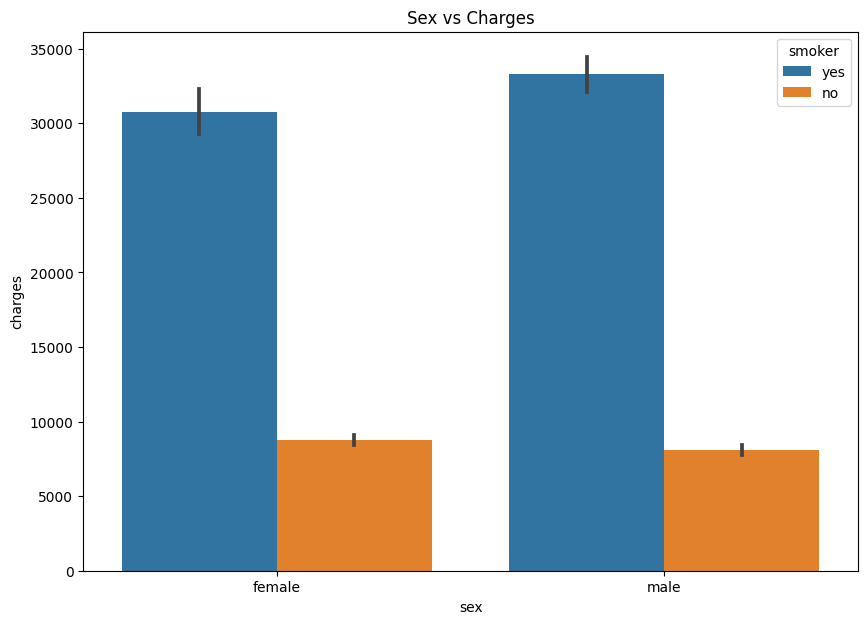

In [9]:
sns.barplot(x='sex',y='charges',hue='smoker',data=df)
plt.title('Sex vs Charges')

Text(0.5, 1.0, 'Region vs Charges')

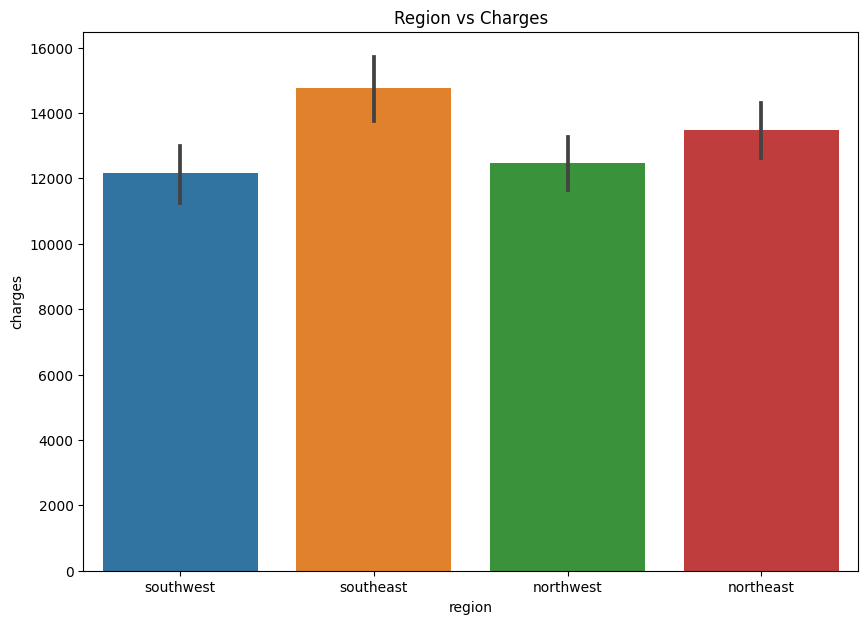

In [10]:
sns.barplot(x='region',y='charges',data=df)
plt.title('Region vs Charges')

<Axes: xlabel='age', ylabel='Count'>

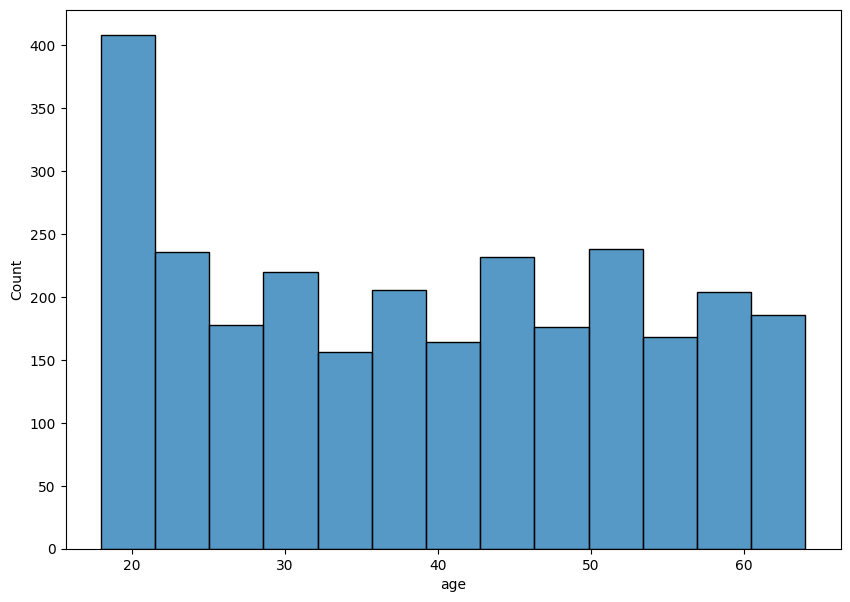

In [11]:
sns.histplot(data=df['age'])

<Axes: xlabel='age', ylabel='Count'>

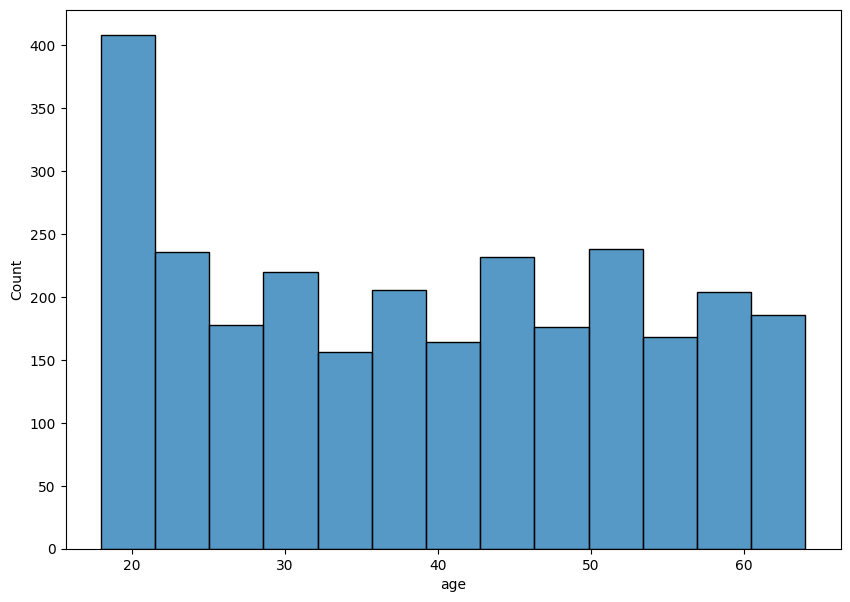

In [12]:
sns.histplot(data=df['age'])

Text(0.5, 1.0, 'BMI vs Charges')

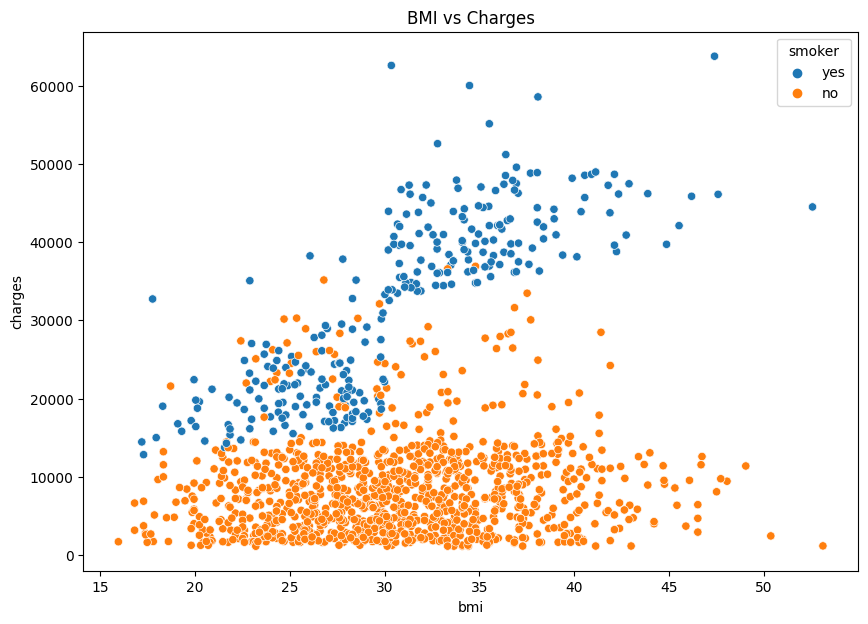

In [13]:
sns.scatterplot(x="bmi", y="charges",hue='smoker', data=df)
plt.title('BMI vs Charges')

Text(0.5, 1.0, 'Age vs Charges')

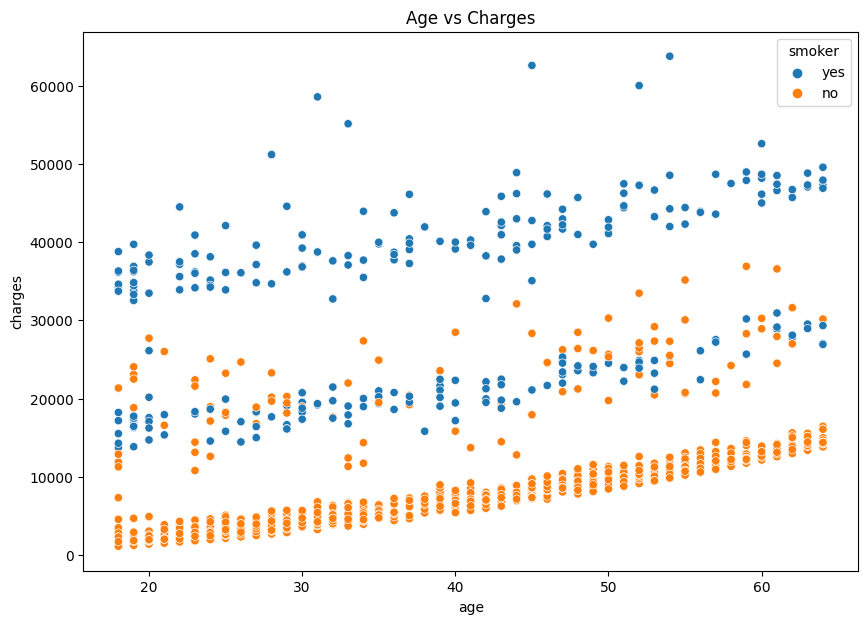

In [14]:
sns.scatterplot(x='age',y='charges',hue='smoker',data=df)
plt.title('Age vs Charges')

Text(0.5, 1.0, 'Outlier Age vs Charges')

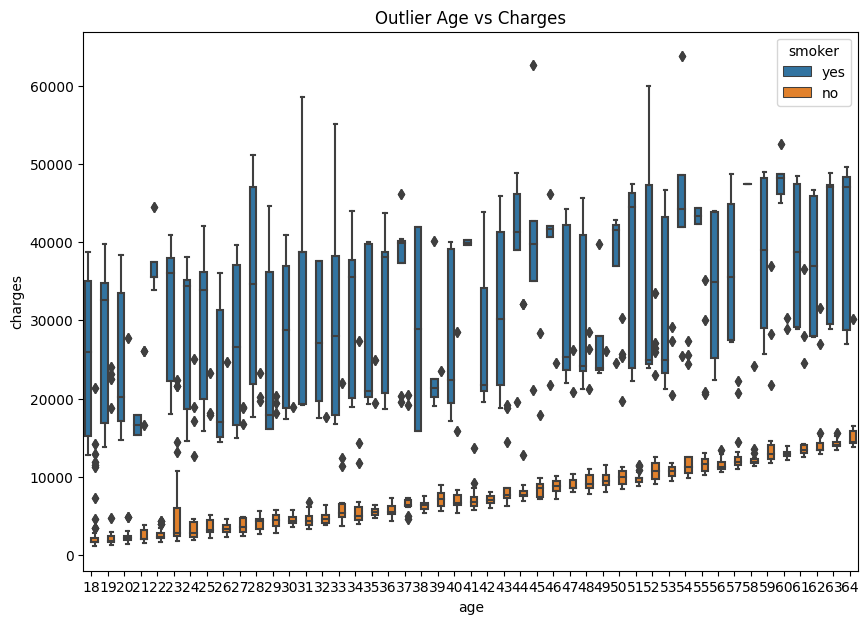

In [15]:
sns.boxplot(x='age',y='charges',hue='smoker',data=df)
plt.title('Outlier Age vs Charges')

## Preprocessing Data Encoding & Outlier Handling

In [16]:
#drop unnecessary column
df_encoded = df.drop('children',axis=1)

In [17]:
df_encoded['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
# Encode smoker column

mapping = {'yes':1, 'no':2}

encoder = LabelEncoder()

encoder.fit(list(mapping.keys()))

df_encoded['smoker'] = encoder.transform(df_encoded['smoker'])

In [19]:
# Encode sex column

encoder = LabelEncoder()

special_mapping = {'male':1,'female':0}

df_encoded['sex'] = df_encoded['sex'].map(special_mapping).fillna(df_encoded['sex'])


In [20]:
# rounding charges value into only 3 number behind dot
df_encoded['charges'].round(3)

0       16884.924
1        1725.552
2        4449.462
3       21984.471
4        3866.855
          ...    
2767     8569.862
2768     2020.177
2769    16450.895
2770    21595.382
2771     9850.432
Name: charges, Length: 2772, dtype: float64

In [21]:
# Encode region column

region_encoded = pd.get_dummies(df['region'])
df_encoded = pd.concat([df_encoded.drop('region',axis=1),region_encoded],axis=1)
df_encoded.head()

,age,sex,bmi,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,1,16884.92400,0,0,0,1
1,18,1,33.770,0,1725.55230,0,0,1,0
2,28,1,33.000,0,4449.46200,0,0,1,0
3,33,1,22.705,0,21984.47061,0,1,0,0
4,32,1,28.880,0,3866.85520,0,1,0,0


In [22]:
df_encoded.head()

,age,sex,bmi,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,1,16884.92400,0,0,0,1
1,18,1,33.770,0,1725.55230,0,0,1,0
2,28,1,33.000,0,4449.46200,0,0,1,0
3,33,1,22.705,0,21984.47061,0,1,0,0
4,32,1,28.880,0,3866.85520,0,1,0,0


In [23]:
# category = ['remaja','dewasa','lansia']
# age = [0,20,59,100]

# df_encoded['age'] = pd.cut(df_encoded['age'],labels=category,bins=age,include_lowest=True)
# df_encoded.head()

In [24]:
# age_encoded = pd.get_dummies(df_encoded['age'])
# df_encoded = pd.concat([df_encoded.drop('age',axis=1),age_encoded],axis=1)
# df_encoded.head()

In [25]:
# Filter data based on smoker equals 1
filtered_data = df_encoded[df_encoded['smoker'] == 1]

# median from charges when smoker equals 0
median_charges = filtered_data['charges'].median()

# calculate quartile IQR method
Q1 = filtered_data['charges'].quantile(0.25)
Q3 = filtered_data['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outlier identification
outliers = filtered_data[(filtered_data['charges'] < lower_bound) | (filtered_data['charges'] > upper_bound)]

# swap outlier value into median value
df_encoded.loc[outliers.index, 'charges'] = median_charges


In [26]:
# Filter data based on smoker equals 0
filtered_data = df_encoded[df_encoded['smoker'] == 0]

# median from charges when smoker equals 0
median_charges = filtered_data['charges'].median()

# calculate quartile IQR method
Q1 = filtered_data['charges'].quantile(0.25)
Q3 = filtered_data['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outlier identification
outliers = filtered_data[(filtered_data['charges'] < lower_bound) | (filtered_data['charges'] > upper_bound)]

# swap outlier value into median value
df_encoded.loc[outliers.index, 'charges'] = median_charges


In [27]:
X = df_encoded.drop('charges',axis=1)
y= df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X ,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,  mean_squared_error

model= LinearRegression()

model.fit(X_train, y_train)

y_pred1= model.predict(X_test)

lr_mae= mean_absolute_error(y_test ,y_pred1)
print('MAE Linear Regression: ',lr_mae)

lr_rmse = mean_squared_error(y_test, y_pred1, squared=False)
print('RMSE Linear Regression: ',lr_rmse)

MAE Linear Regression:  3570.771290550701
RMSE Linear Regression:  5328.371587380347


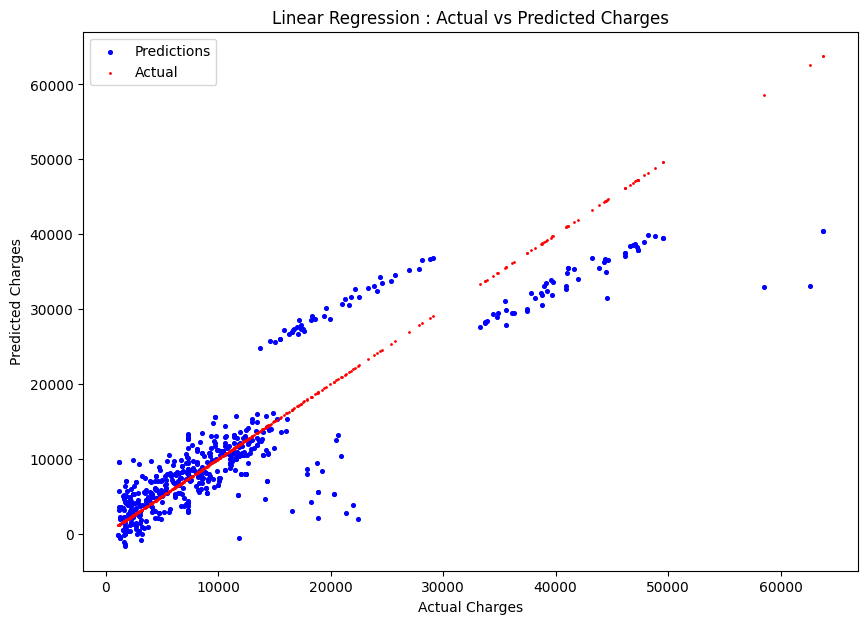

In [30]:
plt.scatter(y_test, y_pred1, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=1)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression : Actual vs Predicted Charges')
plt.legend()
plt.show()

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model= DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred2= model.predict(X_test)

mae= mean_absolute_error(y_test ,y_pred2)
print('Mae Decision Tree: ',mae)

rmse = mean_squared_error(y_test, y_pred2, squared=False)
print('RMSE Decision Tree:',rmse)

Mae Decision Tree:  440.51430087087084
RMSE Decision Tree: 2067.1266657600204


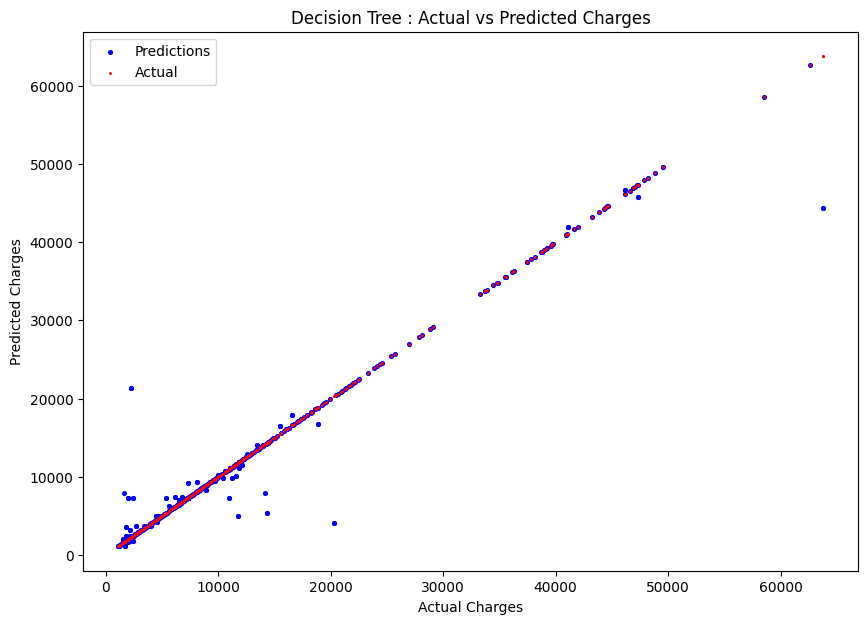

In [32]:
plt.scatter(y_test, y_pred2, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=1)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Decision Tree : Actual vs Predicted Charges')
plt.legend()
plt.show()

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model= RandomForestRegressor()

model.fit(X_train, y_train)

y_pred3= model.predict(X_test)

mae= mean_absolute_error(y_test ,y_pred3)
print('Mae Decision Tree: ',mae)

rmse = mean_squared_error(y_test, y_pred3, squared=False)
print('RMSE Decision Tree:',rmse)

Mae Decision Tree:  997.1515275427698
RMSE Decision Tree: 2245.4423621243336


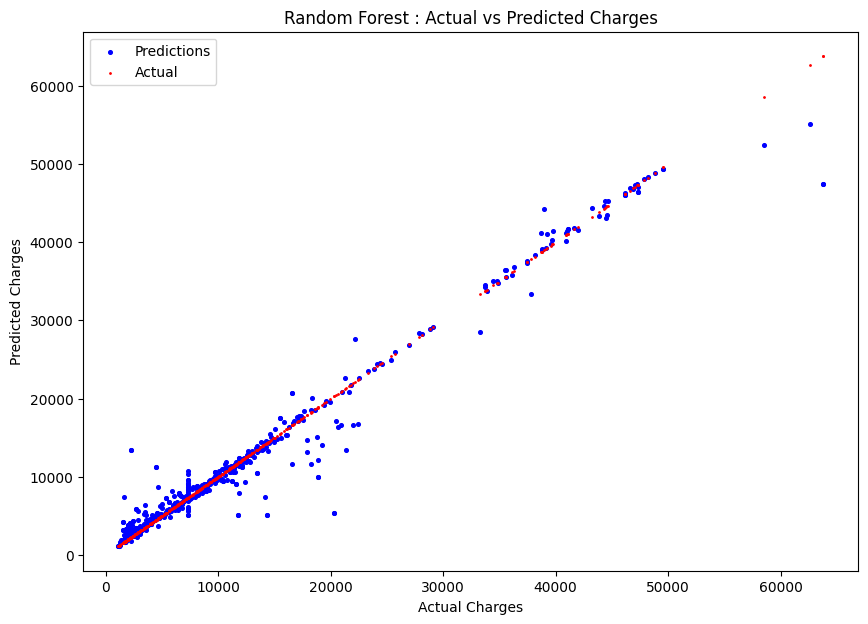

In [34]:
plt.scatter(y_test, y_pred3, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=1)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random Forest : Actual vs Predicted Charges')
plt.legend()
plt.show()

## Bayesian Ridge

In [35]:
from sklearn.linear_model import BayesianRidge

model= BayesianRidge()

model.fit(X_train, y_train)

y_pred4= model.predict(X_test)

mae= mean_absolute_error(y_test ,y_pred4)
print('Mae Decision Tree: ',mae)

rmse = mean_squared_error(y_test, y_pred4, squared=False)
print('RMSE Decision Tree:',rmse)

Mae Decision Tree:  3571.655274504576
RMSE Decision Tree: 5328.754085065705


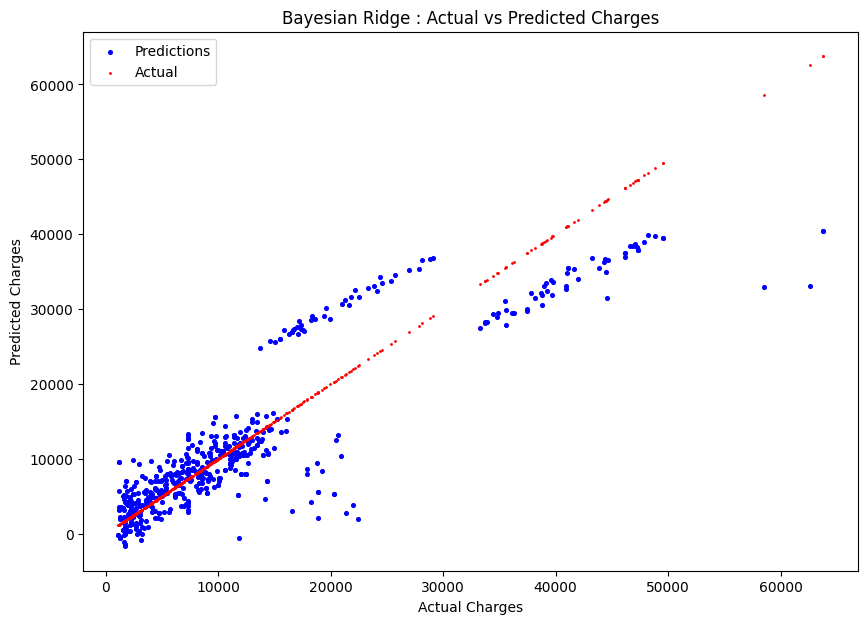

In [36]:
plt.scatter(y_test, y_pred4, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=1)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Bayesian Ridge : Actual vs Predicted Charges')
plt.legend()
plt.show()